In [1]:
import matplotlib.pyplot as plt
from numpy.random import rand
import numpy as np
from matplotlib.widgets  import RectangleSelector

Looks like this works for drawing rectangles. Need to write something to capture the points..

Possibly useful: https://stackoverflow.com/questions/44274938/rectangle-to-select-area-in-plot-and-find-maximum-value

In [2]:
#%matplotlib notebook

# Works with tkagg 
%matplotlib widget

Dowgrading (mamba install ipywidgets==7.7.5) did not work 


In [3]:
ax.set_title?

Object `ax.set_title` not found.


In [4]:

class oyv_sel:

    def __init__(self, xdata, ydata):
    #    self.MYDATA = np.array([[0, 1, 2, 3, 4, 5, 6],
     #                           [0, 0, 0, 0, 0, 0, 0]])
        self.first = True
        self.fig = plt.figure()
        self.ax = self.fig.add_axes([0.05, 0.05, 0.8, 0.75])
     #   self.ax.set_xlim(-1, 7), self.ax.set_ylim(-3, 3), self.ax.grid(True)
      #  self.ax.scatter(self.MYDATA[0], self.MYDATA[1])
        self.xdata, self.ydata = xdata.copy(), ydata.copy()
        self.xdata_return, self.ydata_return = xdata.copy(), ydata.copy()

        line, = self.ax.plot(xdata, ydata)
        point = self.ax.plot(xdata, ydata, '.k', zorder = 3)
        text = self.ax.text(0,0,"")
        xpicks = np.array([])

       # self.button_ax = self.fig.add_axes([0.9, 0.05, 0.1, 0.075])
        self.es = RectangleSelector(self.ax, self.onselect,
                                   interactive=True)
        self.xcoords = np.array([])
        self.ycoords = np.array([])
        self.xcoords_temp = np.array([])
        self.ycoords_temp = np.array([])
        plt.connect('key_press_event', self.toggle_selector)

        plt.show()

        self.ax.set_title('CLICK AND DRAG TO SELECT POINTS.\nPress "R" to remove selected points\n'
                          'Press "D" to discard selection\nPress "X" to exit', ha = 'left', loc = 'left')
        self.temp_label = 'Points to remove'
        self.remove_label = 'Selected points to remove'
    
    def onselect(self, eclick, erelease):

        ext = self.es.extents
        rectangle = Rectangle([ext[0], ext[2]], ext[1]-ext[0], ext[3]-ext[2])

        self.contains_TF_ = rectangle.contains_points(np.vstack([self.xdata, self.ydata]).T) 
        
        self.xcoords_temp = np.concatenate([self.xcoords_temp, self.xdata[self.contains_TF_]])
        self.ycoords_temp = np.concatenate([self.ycoords_temp, self.ydata[self.contains_TF_]])
        print('a')
        try:
            self.temp_scatter.remove()
            plt.draw()
        except:
            pass
        plt.draw()
        self.temp_scatter = self.ax.scatter(self.xcoords_temp, self.ycoords_temp, 
                                            color = 'b', label = self.temp_label)
        self.ax.legend()


    

    def toggle_selector(self, event):
        if event.key.upper() == 'R' : # Save
            self.xcoords = np.concatenate([self.xcoords, self.xcoords_temp])
            self.ycoords = np.concatenate([self.ycoords, self.ycoords_temp])
            self.ax.scatter(self.xcoords, self.ycoords, color = 'r', label =self.remove_label, zorder = 2)
            plt.draw()
            self.remove_label = None
            self.xcoords_temp = np.array([])
            self.ycoords_temp = np.array([])
            self.ydata_return[self.contains_TF_] = np.nan
            self.xdata_return[self.contains_TF_] = np.nan
            self.ax.legend()


        if event.key.upper() =='D':# Discard
            try:
                self.temp_scatter.remove()
                plt.show()
            except:
                pass
                
            self.xcoords_temp = np.array([])
            self.ycoords_temp = np.array([])


        if event.key.upper()== 'X' :# Discard
            
            print('EXIT.')
            plt.close(self.fig)
            fig, ax = plt.subplots(1, 2, sharex = True, sharey = True)
            line0 = ax[0].plot(self.xdata, self.ydata)
            line0 = ax[0].plot(self.xcoords, self.ycoords, '.r')

          #  point, = ax[0].plot(self.xdata, self.ydata), marker="o", color="crimson")
            line1 = ax[1].plot(self.xdata_return, self.ydata_return)

            # Click button to save or preserve?
            # Option to remove from all variables of just this one
            # Test on different systems..
            # Option to show (bin avged?) cruise profiles behine the main one?

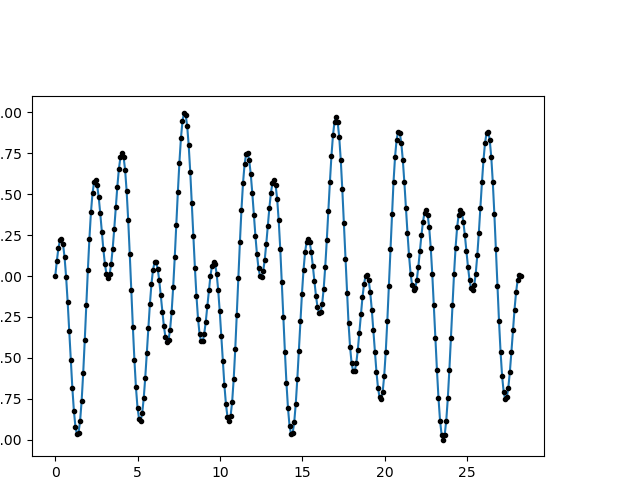

In [32]:
plt.close('all')
xdata = np.linspace(0,9*np.pi, num=301)
ydata = np.sin(xdata)*np.cos(xdata*2.4)
sel = oyv_sel(xdata, ydata)

In [15]:
sel

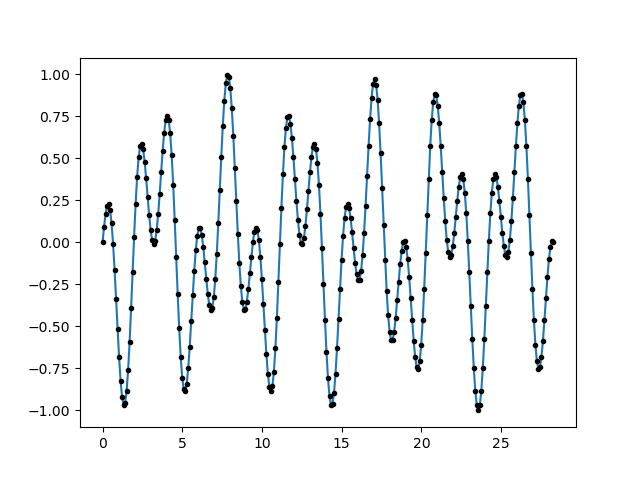

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import ipywidgets as widgets
from IPython.display import display

class oyv_sel:
    def __init__(self, xdata, ydata):
        self.first = True
        self.fig, self.ax = plt.subplots()
        self.fig.canvas.header_visible = False  # Hide the figure header

        self.xdata, self.ydata = xdata.copy(), ydata.copy()
        self.xdata_return, self.ydata_return = xdata.copy(), ydata.copy()

        line, = self.ax.plot(xdata, ydata)
        point = self.ax.plot(xdata, ydata, '.k', zorder=3)
        text = self.ax.text(0, 0, "")
        xpicks = np.array([])

        self.es = RectangleSelector(self.ax, self.onselect, interactive=True)

        self.xcoords_remove = np.array([])
        self.ycoords_remove = np.array([])
        self.xcoords_selected = np.array([])
        self.ycoords_selected = np.array([])

        self.temp_label = 'Points to remove'
        self.remove_label = 'Selected points to remove'

        # Add widgets
        self.button_remove = widgets.Button(description="Remove selected")
        self.button_remove.on_click(self.remove_selected)

        self.button_forget = widgets.Button(description="Forget selection")
        self.button_forget.on_click(self.forget_selection)

        self.button_apply = widgets.Button(description="Exit and apply to data")
        self.button_apply.on_click(self.exit_and_apply)

        display(widgets.HBox([self.button_remove, self.button_forget, self.button_apply]))

    def onselect(self, eclick, erelease):
        ext = self.es.extents
        rectangle = plt.Rectangle((ext[0], ext[2]), ext[1] - ext[0], ext[3] - ext[2])

        self.contains_TF_ = rectangle.contains_points(np.vstack([self.xdata, self.ydata]).T)

        self.xcoords_selected = np.concatenate([self.xcoords_selected, 
                                                self.xdata[self.contains_TF_]])
        self.ycoords_selected = np.concatenate([self.ycoords_selected, 
                                                self.ydata[self.contains_TF_]])

        try:
            self.temp_scatter.remove()
            plt.draw()
        except:
            pass
        plt.draw()
        self.temp_scatter = self.ax.scatter(self.xcoords_selected, 
                        self.ycoords_selected, color='b', label=self.temp_label)
        self.ax.legend()
    
    def remove_selected(self, button):
        if self.remove_label:
            self.xcoords_remove = np.concatenate(
                [self.xcoords_remove, self.xcoords_selected])
            self.ycoords_remove = np.concatenate(
                [self.ycoords_remove, self.ycoords_selected])
            
            self.ax.scatter(self.xcoords_remove, self.ycoords_remove, color='r', 
                            label=self.remove_label, zorder=2)
            plt.draw()
            self.remove_label = None
            self.xcoords_selected = np.array([])
            self.ycoords_selected = np.array([])
            self.ydata_return[self.contains_TF_] = np.nan
            self.xdata_return[self.contains_TF_] = np.nan
            self.ax.legend()
    
            # Deactivate and reactivate the RectangleSelector
            #self.es.set_active(False)
           # self.es.set_active(True)

    def forget_selection(self, button):
        try:
            self.temp_scatter.remove()
            plt.draw()
        except:
            pass

        self.xcoords_selected = np.array([])
        self.ycoords_selected = np.array([])


    def exit_and_apply(self, button):
        print('APPLIED TO DATASET.')
        plt.close(self.fig)
        fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
        line0 = ax[0].plot(self.xdata, self.ydata)
        line0 = ax[0].plot(self.xcoords_remove, self.ycoords_remove, '.r')
        line1 = ax[1].plot(self.xdata_return, self.ydata_return)

# Example data
xdata = np.linspace(0, 9 * np.pi, num=301)
ydata = np.sin(xdata) * np.cos(xdata * 2.4)

# Create and show the plot
sel = oyv_sel(xdata, ydata)


In [62]:
plt.close('all')

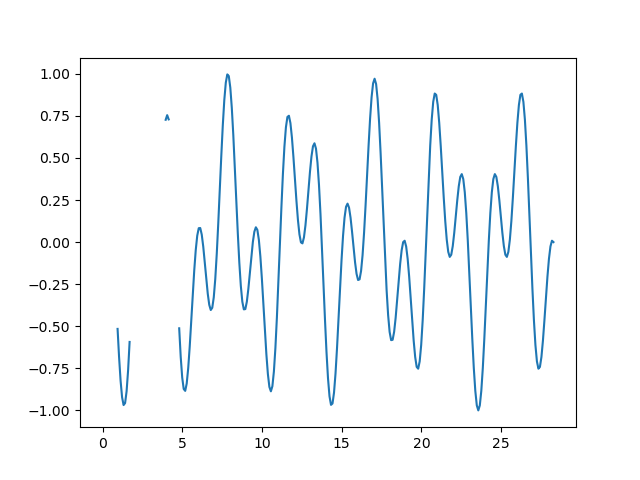

In [64]:
fig, ax = plt.subplots()
ax.plot(sel.xdata_return, sel.ydata_return)

In [51]:
plt.subplots_adjust(top = 1)

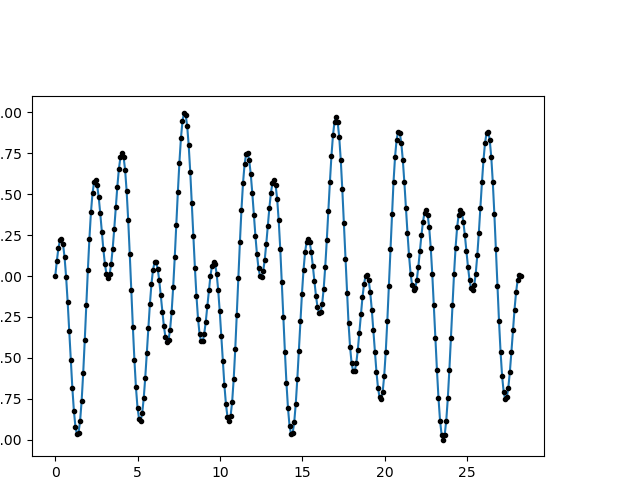

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector

class oyv_sel:
    def __init__(self, xdata, ydata):
        self.first = True
        self.fig = plt.figure()
        self.ax = self.fig.add_axes([0.05, 0.05, 0.8, 0.75])
        self.fig.canvas.header_visible = False  # Hide the figure header

        self.xdata, self.ydata = xdata.copy(), ydata.copy()
        self.xdata_return, self.ydata_return = xdata.copy(), ydata.copy()

        line, = self.ax.plot(xdata, ydata)
        point = self.ax.plot(xdata, ydata, '.k', zorder=3)
        text = self.ax.text(0, 0, "")
        xpicks = np.array([])

        self.es = RectangleSelector(self.ax, self.onselect, interactive=True)

        self.xcoords = np.array([])
        self.ycoords = np.array([])
        self.xcoords_temp = np.array([])
        self.ycoords_temp = np.array([])

        plt.subplots_adjust(top = 1)        
        self.temp_label = 'Points to remove'
        self.remove_label = 'Selected points to remove'

    def onselect(self, eclick, erelease):
        ext = self.es.extents
        rectangle = plt.Rectangle((ext[0], ext[2]), ext[1] - ext[0], ext[3] - ext[2])

        self.contains_TF_ = rectangle.contains_points(np.vstack([self.xdata, self.ydata]).T)

        self.xcoords_temp = np.concatenate([self.xcoords_temp, self.xdata[self.contains_TF_]])
        self.ycoords_temp = np.concatenate([self.ycoords_temp, self.ydata[self.contains_TF_]])

        try:
            self.temp_scatter.remove()
            plt.draw()
        except:
            pass
        plt.draw()
        self.temp_scatter = self.ax.scatter(self.xcoords_temp, self.ycoords_temp,
                                            color='b', label=self.temp_label)
        self.ax.legend()

# Example data
xdata = np.linspace(0, 9 * np.pi, num=301)
ydata = np.sin(xdata) * np.cos(xdata * 2.4)

# Create and show the plot
sel = oyv_sel(xdata, ydata)
plt.show()
